强弱类型还是不要使用这种词汇，维基百科也说没有明确定义什么是弱类型语言, 使用类型安全(type safety)来代替。还有一个很恶心就是 dynamically typed，it’s ambiguous. 另外 static/dynamic checking 也很好. 毫无疑问, Java 是 safe type(因为Java不会自动转换, 比如你把一个double复制给int, 编译器就会提示错误, 而gcc就不会报错, 所以c++是unsafe type), 且是static checking. 

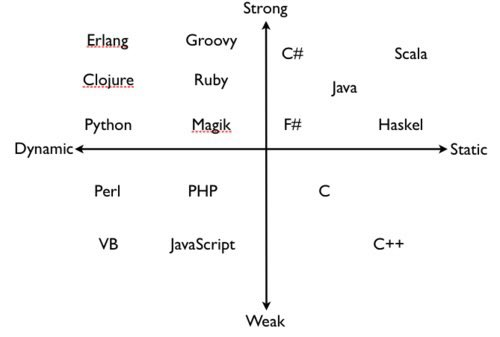

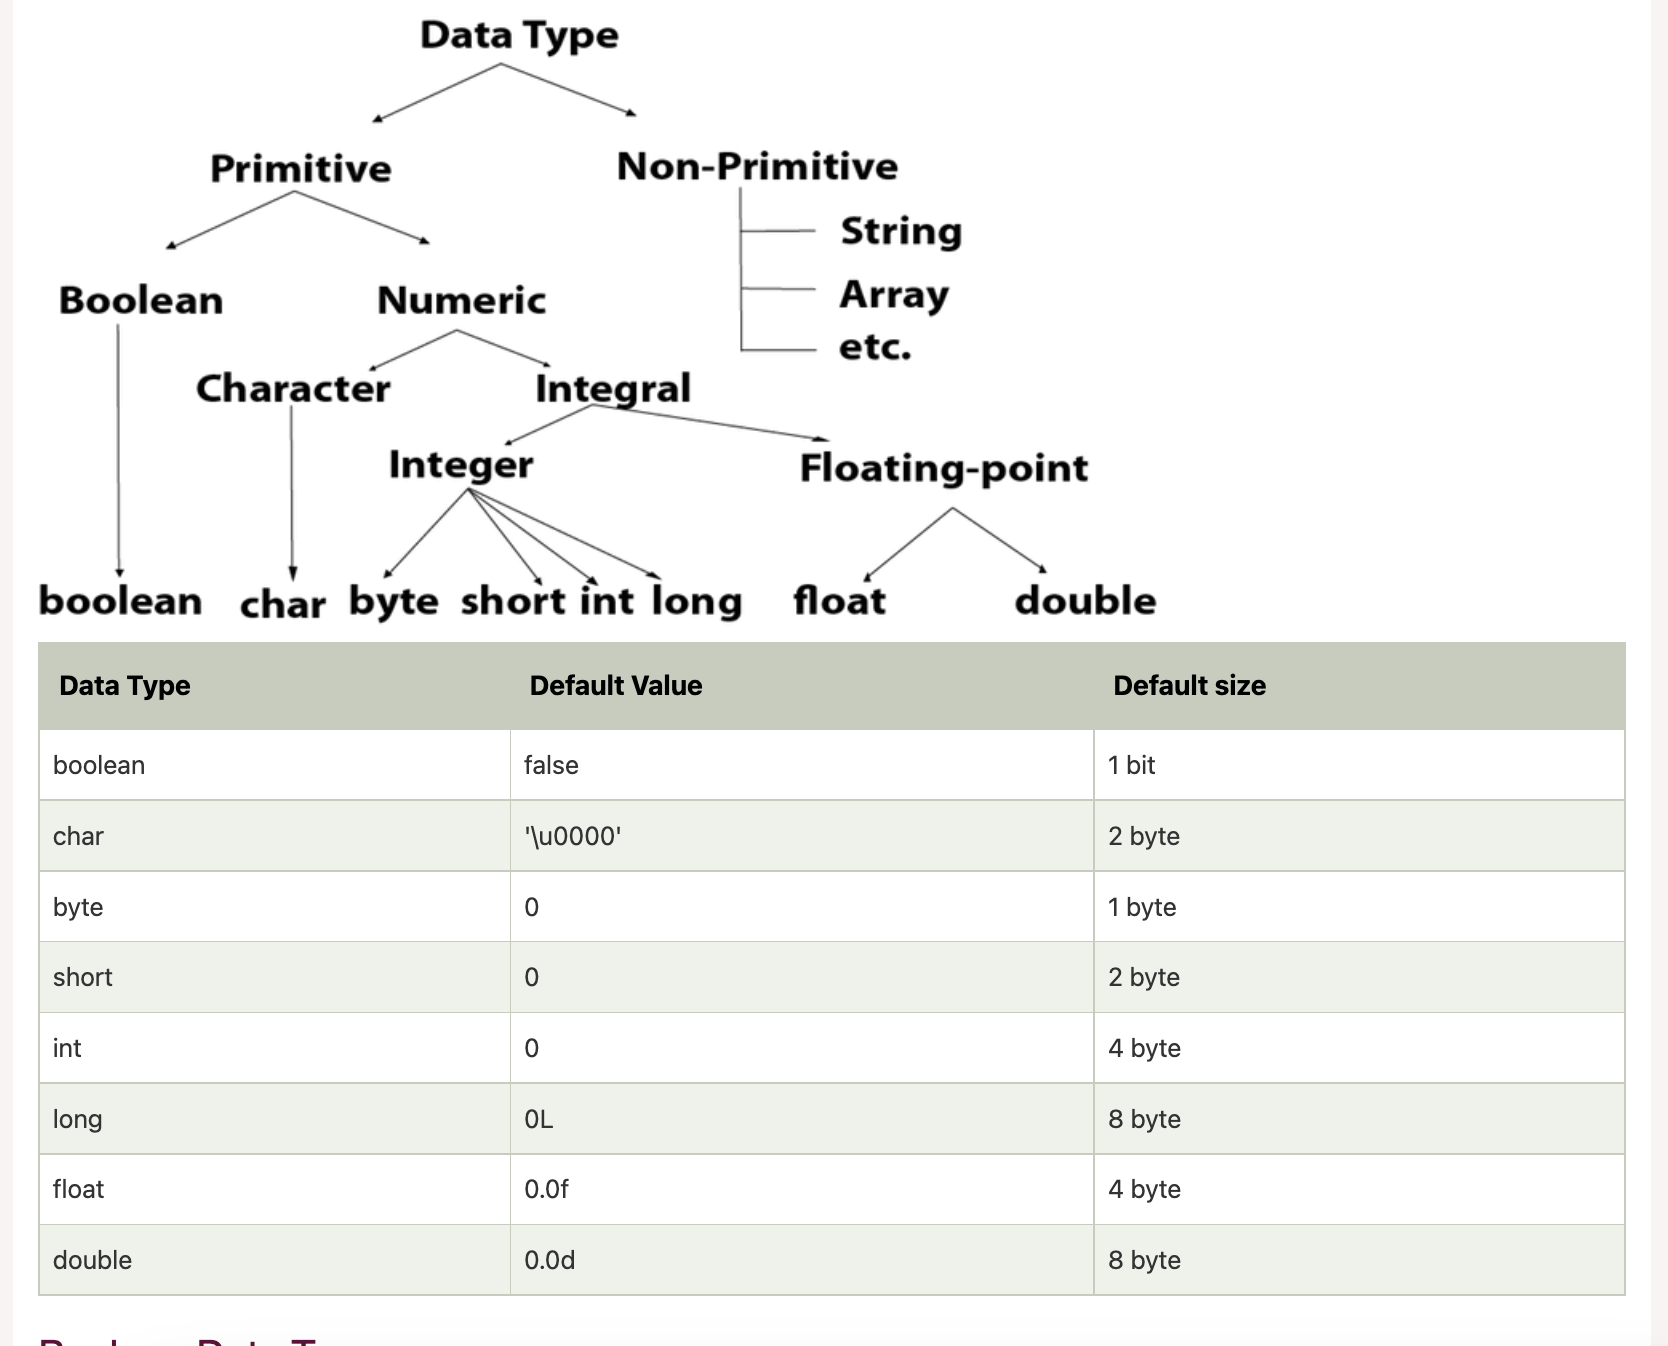

# Non-Primitive Type
---

主要想说一下non-primitive类型(引用类型), 基础类型上面一张图就很清楚了, 注意看哦, String和数组都是non-primitive类型. 哦, 另外注意一下, Java使用的是unicode编码, 所以一个字符char是两字节, utf-8是为了节约空间由unicode演变出来的可变长编码.

引用类型名字的来源: Whenever a non-primitive data type is defined, it refers a memory location where the data is stored in heap memory i.e., it refers to the memory location where an object is placed. Therefore, a non-primitive data type variable is also called referenced data type(引用类型) or simply object reference variable. 

An object reference variable lives on the stack memory and the object to which it points always lives on the heap memory. The stack holds a pointer to the object on the heap.

In Java programming, all non-primitive data types are simply called objects that are created by instantiating a class.

- The default value of **any reference variable** is null.
- Whenever we are passing a non-primitive data type to a method, we are passing the address of that object where the data is stored. (看清楚人家说的只是当传递non-primitive的时候, 传递的是地址)

所以Java是引用传递还是值传递? (**其实就是操作的是一块内存还是新开辟了一块内存的区别**)
> 不要纠结于 Pass By Value 和 Pass By Reference 的字面上的意义，否则很容易陷入所谓的“一切传引用其实本质上是传值”这种并不能解决问题无意义论战中。https://www.zhihu.com/question/31203609/answer/50992895

### 1 搞清楚 基本类型 和 引用类型的不同之处

```java
int num = 10;
String str = "hello";
```
`num`是基本类型，值就直接保存在变量中。而`str`是引用类型，变量中保存的只是实际对象的地址。一般称这种变量为"引用"，引用指向实际对象，实际对象中保存着内容。

### 2 搞清楚赋值运算符（=）的作用

```java
num = 20;
str = "java";
```
对于基本类型`num `，赋值运算符会直接改变变量的值，原来的值被覆盖掉。

对于引用类型 `str`，赋值运算符会改变引用(str)中所保存的地址，原来的地址被覆盖掉。但是原来的对象不会被改变（重要）。(没有被任何引用所指向的对象是垃圾，会被垃圾回收器回收)

### 3 调用方法时发生了什么？参数传递基本上就是赋值操作

```java
第一个例子：基本类型
void foo(int value) {
    value = 100;
}
foo(num); // num 没有被改变

第二个例子：没有提供改变自身方法的引用类型
void foo(String text) {
    text = "windows";
}
foo(str); // str 也没有被改变

第三个例子：提供了改变自身方法的引用类型
StringBuilder sb = new StringBuilder("iphone");
void foo(StringBuilder builder) {
    builder.append("4");
}
foo(sb); // sb 被改变了，变成了"iphone4"。

第四个例子：提供了改变自身方法的引用类型，但是不使用，而是使用赋值运算符。
StringBuilder sb = new StringBuilder("iphone");
void foo(StringBuilder builder) {
    builder = new StringBuilder("ipad");
}
foo(sb); // sb 没有被改变，还是 "iphone"。
```

---


我们都知道**JVM内存模型**中有，stack和heap的存在，但是更准确的说，是每个线程都分配一个独享的stack，所有线程共享一个heap。对于每个方法的局部变量来说，是绝对无法被其他方法，甚至其他线程的同一方法所访问到的，更遑论修改。

当我们在方法中声明一个 `int i = 0`，或者 `Object obj = null` 时，仅仅涉及stack，不影响到heap，当我们 new Object() 时，会在heap中开辟一段内存并初始化Object对象。当我们将这个对象赋予obj变量时，仅仅是stack中代表obj的那4个字节变更为这个对象的地址。

当我们声明一个**数组**时，如`int[] arr = new int[10]`，因为数组也是对象，arr实际上是引用，stack上仅仅占用4字节空间，new int[10]会在heap中开辟一个数组对象，然后arr指向它。所以当我们传递一个数组引用给一个方法时，数组的元素是可以被改变的，但是无法让数组引用指向新的数组。


---

关于对象和引用, 我想说一下, 比如`Cat kitten = new Cat(1, "kitty")`, kitten就是引用, 它的值是对象在heap上的内存地址, 但kitten本身存储在stack上. 所以呢**kitten一般叫引用(reference), 当然也可以叫变量**. 

我们知道对象都是存储在堆中, 那现在有个问题, 就是String的对象存储在常量池呢还是堆中呢? 还有个问题, 就是常量池在堆中吗?

先看第二个问题, 其实这个问题不确定, 因为不同的JVM实现不同. 想知道你就要去看具体版本JVM的specification. 我看的[这个版本](https://docs.oracle.com/javase/specs/jvms/se8/html/jvms-2.html#jvms-2.5.5)的JVM的spec说的是, string constant pool在method area, 然后又说method逻辑上属于heap区. 所以常量池就在堆中, 那你说string对象在哪呢?

```java
String str_1 = "Jack"; // 在常量池
String str_2 = new String("Kangkang"); // 对象在堆中, 引用在stack
```
当然某些JVM实现会把"kangkang"字面量生成的String对象放到常量池中，而常量池中的对象可以实际分配在heap中，有些实现也许会分配在方法区，当然这对我们理解影响不大。


---

string,array和class一样都是引用类型, 所以他们的对象都存在heap. 